# **Web Scraping**

In [ ]:
#Importing basic libraries
import pandas as pd
import numpy as np
import seaborn as sns
from datetime import date
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
#Using Selenium because data table in the site is loaded dynamically

!pip install selenium
!apt-get update # to update ubuntu to correctly run apt install
!apt install chromium-chromedriver
!cp /usr/lib/chromium-browser/chromedriver /usr/bin
import sys
sys.path.insert(0,'/usr/lib/chromium-browser/chromedriver')
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC

     |████████████████████████████████| 911kB 5.8MB/s 
Ign:1 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Get:2 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease [3,626 B]
Get:3 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease [15.9 kB]
Get:4 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Ign:5 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Hit:6 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release
Hit:7 http://archive.ubuntu.com/ubuntu bionic InRelease
Hit:8 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Get:9 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Hit:10 http://ppa.launchpad.net/cran/libgit2/ubuntu bionic InRelease
Get:11 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ Packages [49.8 kB]
Get:12 http://archive.ub

In [ ]:
#Importing BeautifulSoup

from bs4 import BeautifulSoup
import requests

#Configuring the Chrome Webdriver to operate smoothly in Google colab
chrome_options = webdriver.ChromeOptions()
chrome_options.add_argument('--headless')
chrome_options.add_argument('--no-sandbox')
chrome_options.add_argument('--disable-dev-shm-usage')
driver= webdriver.Chrome('chromedriver',chrome_options=chrome_options)

#Initialization
site= "https://covid19ph.com/cases"
driver.get(site)
content = driver.page_source.encode('utf-8').strip()
soup = BeautifulSoup(content, 'html.parser')

#Finding the table that contains the info
table = soup.find('table', {"class":"text-left w-full text-xs mb-3"})
rows = table.find_all('tr')
data=[]
a=1

#Looping for next pages...
while True:
  for row in rows:
      cols = row.find_all('td')
      cols = [ele.text.strip() for ele in cols]
      data.append([ele for ele in cols if ele])
  print('Done getting info on page {}...'.format(a))
  a+=1

  #Line to find if the current page is the last page then the while loop breaks
  linedata = soup.find('span', {"class":"sm:px-4 font-bold text-blue-500 sm:text-base text-sm"})
  maxdata = linedata.text.strip().split()[2]
  currentdata = linedata.text.strip().split()[0].split('-')[1]
  if currentdata == maxdata:
    break

  #Clicking the next page, the last page still has a next button thats why I put a checker block above
  try:
    nextpage = WebDriverWait(driver, 30).until(EC.presence_of_element_located((By.XPATH, '//li[contains(@class, "right-arrow")]//a[contains(@class,"text-white")]')))
    driver.execute_script("arguments[0].click();", nextpage)
    soup = BeautifulSoup(driver.page_source,"lxml")
    table = soup.find('table', {"class":"text-left w-full text-xs mb-3"})
    rows = table.find_all('tr')

  except:
    break

print('There are {} entries in the website.'.format(maxdata))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: DeprecationWarning: use options instead of chrome_options
  # This is added back by InteractiveShellApp.init_path()


Done getting info on page 1...
Done getting info on page 2...
Done getting info on page 3...
Done getting info on page 4...
Done getting info on page 5...
Done getting info on page 6...
Done getting info on page 7...
Done getting info on page 8...
Done getting info on page 9...
Done getting info on page 10...
Done getting info on page 11...
Done getting info on page 12...
Done getting info on page 13...
Done getting info on page 14...
Done getting info on page 15...
Done getting info on page 16...
Done getting info on page 17...
Done getting info on page 18...
Done getting info on page 19...
Done getting info on page 20...
Done getting info on page 21...
Done getting info on page 22...
Done getting info on page 23...
Done getting info on page 24...
Done getting info on page 25...
Done getting info on page 26...
Done getting info on page 27...
Done getting info on page 28...
Done getting info on page 29...
Done getting info on page 30...
Done getting info on page 31...
Done getting info

# **Data Cleaning**

In [ ]:
#Removing the possible duplicates...
data = list(map(list,set(map(tuple,data))))

In [ ]:
#Converting the list into pandas dataframe
df = pd.DataFrame(data,columns=['Case, Age, and Sex','City and Region','Status','Admitted','Result Date','drop'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34804 entries, 0 to 34803
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Case, Age, and Sex  34803 non-null  object
 1   City and Region     34803 non-null  object
 2   Status              34803 non-null  object
 3   Admitted            34803 non-null  object
 4   Result Date         31933 non-null  object
 5   drop                11238 non-null  object
dtypes: object(6)
memory usage: 1.6+ MB


In [ ]:
df.describe().T

,count,unique,top,freq
"Case, Age, and Sex",34803,34803,PH-X28491X 29 - Female,1
City and Region,34803,721,CEBU CITY Region VII: Central Visayas,4490
Status,34803,52,Active,21289
Admitted,34803,105,Yes,6705
Result Date,31933,116,Info,20695
drop,11238,1,Info,11238


In [ ]:
#Removing and blank rows...
df.dropna(axis=0,how='all',inplace=True)
#Checking the length if it matches the length of entries in the site (apparent = 11350)
print('There are {} entries in the Dataframe.'.format(len(df)))

There are 34803 entries in the Dataframe.


In [ ]:
#Checking for errors in the table.
df.sample(20)

,"Case, Age, and Sex",City and Region,Status,Admitted,Result Date,drop
15222,PH-X26722X 20 - Male,CITY OF LAS PIÑAS NCR,Active,No,Jun-03-2020,Info
23070,PH-X11797X 18 - Female,CITY OF MANDALUYONG NCR,Recovered,Apr-13-2020,Info,None
16731,PH-X22596X 35 - Male,TAGUIG CITY NCR,Recovered,No,May-28-2020,Info
12683,PH-X12519X 44 - Male,CITY OF BIÑAN Region IV-A: CALABARZON,Recovered,Apr-16-2020,Info,None
468,PH-X7656X 79 - Female,TAGUIG CITY NCR,Deceased,Yes,Mar-25-2020,Info
33359,PH-X27835X 24 - Male,Active,Jun-06-2020,Info,None,None
9035,PH-X4948X 57 - Male,CITY OF TALISAY Region VII: Central Visayas,Active,Jun-25-2020,Info,None
16689,PH-X4962X 27 - Male,CITY OF MANILA NCR,Active,No,Jun-25-2020,Info
31325,PH-X15595X 43 - Male,CEBU CITY Region VII: Central Visayas,Recovered,May-01-2020,Info,None
818,PH-X32701X 28 - Male,CEBU CITY Region VII: Central Visayas,Active,Jun-14-2020,Info,None


In [ ]:
#Data Cleaning necessary:
#Parse the 1st column to extract the Case #, Age, and Sex
#Parse the 2nd column to extract the City and Region
#Some values in the Admitted column are supposed to be in the Positive Result Date column, we have to shift those columns to the right
#Parse the date column to extract the month

In [ ]:
# 1. Parsing the 1st column to extract the Case#, Age, and Sex:
df['Case #'] = df['Case, Age, and Sex'].apply(lambda x: x.split()[0])
df['Age'] = df['Case, Age, and Sex'].apply(lambda x: x.split()[1])
df['Sex'] = df['Case, Age, and Sex'].apply(lambda x: x.split()[-1])

In [ ]:
#Checking for entries with unknown age...
df[df['Age'].str.isnumeric()==False]

,"Case, Age, and Sex",City and Region,Status,Admitted,Result Date,drop,Case #,Age,Sex
151,PH-X24626X - Male,Repatriate,Active,May-31-2020,Info,None,PH-X24626X,-,Male
249,PH-X28529X - Male,Repatriate,Active,Jun-07-2020,Info,None,PH-X28529X,-,Male
287,PH-X22875X - Male,Repatriate,Active,May-29-2020,Info,None,PH-X22875X,-,Male
418,PH-X22908X - Male,Repatriate,Active,May-29-2020,Info,None,PH-X22908X,-,Male
429,PH-X12249X - Male,NCR,Recovered,Apr-15-2020,Info,None,PH-X12249X,-,Male
...,...,...,...,...,...,...,...,...,...
33730,PH-X24467X - Female,Repatriate,Active,May-31-2020,Info,None,PH-X24467X,-,Female
33796,PH-X3342X - Male,NCR,Active,Jun-23-2020,Info,None,PH-X3342X,-,Male
34247,PH-X14923X - Male,QUEZON CITY NCR,Active,Apr-28-2020,Info,None,PH-X14923X,-,Male
34401,PH-X30405X - Male,Repatriate,Active,Jun-10-2020,Info,None,PH-X30405X,-,Male


In [ ]:
#Replacing - age with NaN
df['Age'].replace('-',np.nan,inplace=True)
print('There are {} entries with unknown age.'.format(df['Age'].isnull().sum()))

There are 154 entries with unknown age.


In [ ]:
#Checking for the Sex feature if there are any error...
df['Sex'].value_counts()

Male      19484
Female    15319
Name: Sex, dtype: int64

In [ ]:
# 2. Parse the 2nd column to extract the City and Region:
df['Region'] = np.nan
df['City'] = np.nan
for i, row in df.iterrows():
  #Parsing the Region to those the word "Region"
  if 'Region' in row['City and Region']:
    df['Region'][i] = str('Region') + row['City and Region'].split('Region')[1]
    df['City'][i] = row['City and Region'].split('Region')[0]
  #Parsing the Region to those without the word "Region" (e.g. NCR, CAR, ARMM)
  else:
    df['Region'][i] = row['City and Region'].split()[-1]
    df['City'][i]= ' '.join(row['City and Region'].split()[0:-1])
  


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
#Replacing the unknown region and city with nan
df['City'].replace('',np.nan,inplace=True)
df['Region'].replace('',np.nan,inplace=True)
#There are some "Active" in the City and Region column because they didn't have city and region
df['City'].replace('Active',np.nan,inplace=True)
df['Region'].replace('Active',np.nan,inplace=True)

In [ ]:
#Some values in the Admitted column are supposed to be in the Positive Result Date column, we have to shift those columns to the right
#the columns are shifted if the drop column is not "info"
df[df['drop']!='Info'].head(3)

,"Case, Age, and Sex",City and Region,Status,Admitted,Result Date,drop,Case #,Age,Sex,Region,City
1,PH-X28460X 7 - Male,Region VII: Central Visayas,Active,Jun-07-2020,Info,None,PH-X28460X,7,Male,Region VII: Central Visayas,NaN
2,PH-X2970X 51 - Female,Active,Jun-23-2020,Info,None,None,PH-X2970X,51,Female,NaN,NaN
3,PH-X20596X 11 - Male,PASAY CITY NCR,Active,May-22-2020,Info,None,PH-X20596X,11,Male,NCR,PASAY CITY


In [ ]:
#Shifting the columns to the correct alignment
for i, row in df.iterrows():
  if row['Result Date']=='Info':
    row['Admitted'], row['Result Date'], row['drop'] = np.nan,row['Admitted'], 'Info'

  elif row['Admitted']=='Info':
    row['City and Region'], row['Status'],row['Admitted'],row['Result Date'], row['drop'] = np.nan, row['City and Region'],np.nan, row['Status'], 'Info'

  if (row['Status']=='Yes') or (row['Status']=='No'):
    row['Admitted'] = row['Status']
    row['Status'] = row['Region']
    row['Region'] = np.nan



In [ ]:
#Printing the specific values of each feature to check if there are no column misalignment
for cols in df.iloc[:,2:]:
  print('\n')
  print(df[cols].value_counts(dropna=False))



Active       24114
Recovered     9430
Deceased      1236
NaN             23
Name: Status, dtype: int64


NaN    23539
Yes     6729
No      4535
Name: Admitted, dtype: int64


Jun-23-2020    1150
May-29-2020    1043
Jun-26-2020    1004
Jun-20-2020     943
May-31-2020     861
               ... 
Mar-16-2020       2
Feb-07-2020       1
Jan-31-2020       1
Mar-07-2020       1
Feb-02-2020       1
Name: Result Date, Length: 117, dtype: int64


Info    34803
Name: drop, dtype: int64


PH-X12126X    1
PH-X1124X     1
PH-X34698X    1
PH-X5922X     1
PH-X12457X    1
             ..
PH-X34105X    1
PH-X15707X    1
PH-X18467X    1
PH-X13731X    1
PH-X5211X     1
Name: Case #, Length: 34803, dtype: int64


29     1064
30      996
28      964
32      950
27      946
       ... 
96        4
101       3
99        2
97        1
98        1
Name: Age, Length: 102, dtype: int64


Male      19484
Female    15319
Name: Sex, dtype: int64


NCR                               17450
Region VII: Central Visaya

In [ ]:
# 4. Parsing the Result Date
df['Result Date'] = pd.to_datetime(df['Result Date'])
df['Month'] = df['Result Date'].dt.month_name()

#Sorting the dataframe by the date
df.sort_values(by='Result Date',inplace=True)
df.reset_index(drop=True,inplace=True)
df.head()


,"Case, Age, and Sex",City and Region,Status,Admitted,Result Date,drop,Case #,Age,Sex,Region,City,Month
0,PH-X7025X 38 - Female,DUMAGUETE CITY Region VII: Central Visayas,Recovered,NaN,2020-01-31,Info,PH-X7025X,38,Female,Region VII: Central Visayas,DUMAGUETE CITY,January
1,PH-X7026X 44 - Male,DUMAGUETE CITY Region VII: Central Visayas,Deceased,NaN,2020-02-02,Info,PH-X7026X,44,Male,Region VII: Central Visayas,DUMAGUETE CITY,February
2,PH-X7027X 60 - Female,PANGLAO Region VII: Central Visayas,Recovered,Yes,2020-02-07,Info,PH-X7027X,60,Female,Region VII: Central Visayas,PANGLAO,February
3,PH-X7029X 48 - Male,TAGUIG CITY NCR,Recovered,Yes,2020-03-06,Info,PH-X7029X,48,Male,NCR,TAGUIG CITY,March
4,PH-X7028X 62 - Male,CAINTA Region IV-A: CALABARZON,Deceased,Yes,2020-03-06,Info,PH-X7028X,62,Male,Region IV-A: CALABARZON,CAINTA,March


In [ ]:
#Dropping the unneccesary columns and ordering columns
df.drop(['Case, Age, and Sex','City and Region','drop'],axis=1,inplace=True)
df = df[['Case #','Result Date','Month','Age','Sex','City','Region','Admitted','Status']]

In [ ]:
#Checking our cleaned data...
df.sample(10)

,Case #,Result Date,Month,Age,Sex,City,Region,Admitted,Status
12786,PH-X19807X,2020-05-19,May,31,Female,CEBU CITY,Region VII: Central Visayas,Yes,Active
15019,PH-X21890X,2020-05-27,May,29,Female,NaN,NaN,NaN,Active
30295,PH-X2544X,2020-06-22,June,64,Female,CEBU CITY,Region VII: Central Visayas,NaN,Active
19844,PH-X27120X,2020-06-04,June,54,Female,DAGUPAN CITY,Region I: Ilocos,NaN,Active
11168,PH-X18182X,2020-05-12,May,10,Female,CEBU CITY,Region VII: Central Visayas,NaN,Active
11615,PH-X18691X,2020-05-14,May,51,Female,BATANGAS CITY,Region IV-A: CALABARZON,NaN,Active
14847,PH-X21707X,2020-05-27,May,22,Male,NaN,NCR,NaN,Active
32089,PH-X4368X,2020-06-24,June,7,Male,LAPU-LAPU CITY (OPON),Region VII: Central Visayas,NaN,Active
770,PH-X7775X,2020-03-27,March,59,Male,QUEZON CITY,NCR,No,Recovered
11578,PH-X18454X,2020-05-13,May,39,Female,CEBU CITY,Region VII: Central Visayas,NaN,Active


# **Data Visualization**

In [ ]:
print('The first 10 cases of Coronavirus in the Philippines are in the table below. \n\nFrom the table, the first three cases occured in Late January to early February. \n\nThere were no cases occured again after the third case until the early March.\n\n')

df.head(10)

The first 10 cases of Coronavirus in the Philippines are in the table below. 

From the table, the first three cases occured in Late January to early February. 

There were no cases occured again after the third case until the early March.




,Case #,Result Date,Month,Age,Sex,City,Region,Admitted,Status
0,PH-X7025X,2020-01-31,January,38,Female,DUMAGUETE CITY,Region VII: Central Visayas,NaN,Recovered
1,PH-X7026X,2020-02-02,February,44,Male,DUMAGUETE CITY,Region VII: Central Visayas,NaN,Deceased
2,PH-X7027X,2020-02-07,February,60,Female,PANGLAO,Region VII: Central Visayas,Yes,Recovered
3,PH-X7029X,2020-03-06,March,48,Male,TAGUIG CITY,NCR,Yes,Recovered
4,PH-X7028X,2020-03-06,March,62,Male,CAINTA,Region IV-A: CALABARZON,Yes,Deceased
5,PH-X7030X,2020-03-07,March,58,Female,CAINTA,Region IV-A: CALABARZON,Yes,Deceased
6,PH-X7034X,2020-03-08,March,39,Male,CITY OF MAKATI,NCR,Yes,Recovered
7,PH-X7032X,2020-03-08,March,33,Male,CITY OF PASIG,NCR,Yes,Recovered
8,PH-X7033X,2020-03-08,March,57,Male,QUEZON CITY,NCR,Yes,Recovered
9,PH-X7031X,2020-03-08,March,86,Male,CITY OF MARIKINA,NCR,Yes,Deceased


The number of cases in the Philippines rose exponentially from Feb to May.

Even though the president put the luzon under ECQ starting March 15, the curve hasnt flatten yet.

The slope of the curve remains the same up to date.

One can conclude here that the number continued to rise because of the lack of testing kits. 

The Philippines just started to test its people late March, hence the sudden rise of the number starting April. 

Up to now, there hasnt been any mass testing (very minimal) thats happening in the country.




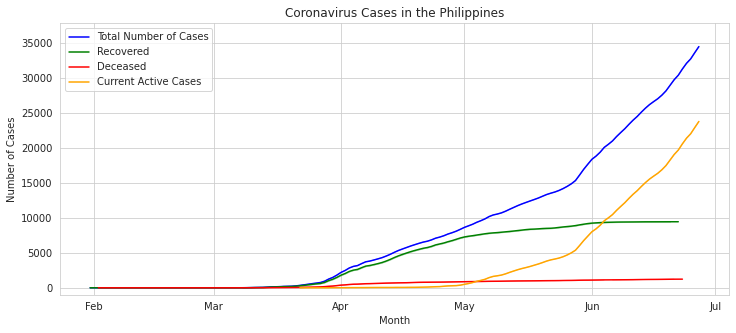

In [ ]:
import matplotlib.dates as mdates

plt.figure(figsize=(12,5))
sns.set_style('whitegrid')
g = sns.lineplot(x='Result Date',y=range(0,len(df)),data=df,color='b', label='Total Number of Cases')
g = sns.lineplot(x='Result Date',y=range(0,len(df[df['Status']=='Recovered'])),data=df[df['Status']=='Recovered'],color='g',label='Recovered')
g = sns.lineplot(x='Result Date',y=range(0,len(df[df['Status']=='Deceased'])),data=df[df['Status']=='Deceased'],color='r',label ='Deceased')
g = sns.lineplot(x='Result Date',y=range(0,len(df[df['Status']=='Active'])),data=df[df['Status']=='Active'],color='orange',label = 'Current Active Cases')
g.set_ylim(-1000,len(df)+3000)
g.set_xlabel('Month')
g.set_ylabel('Number of Cases')
g.set_title('Coronavirus Cases in the Philippines')
g.xaxis.set_major_locator(mdates.MonthLocator())
g.xaxis.set_minor_locator(mdates.DayLocator())
g.xaxis.set_major_formatter(mdates.DateFormatter('%b'))


print('The number of cases in the Philippines rose exponentially from Feb to May.\n\nEven though the president put the luzon under ECQ starting March 15, the curve hasnt flatten yet.\n\nThe slope of the curve remains the same up to date.\n\nOne can conclude here that the number continued to rise because of the lack of testing kits. \n\nThe Philippines just started to test its people late March, hence the sudden rise of the number starting April. \n\nUp to now, there hasnt been any mass testing (very minimal) thats happening in the country.\n\n')


Most people who died from the virus are from the 60-80 age bracket.

It also shows that recoveries are likely to happen for the younger people with the virus.

Apparently, the most number of ACTIVE cases are from the people who are 20-40 years old.

There are also more men with the virus in each of the status category.





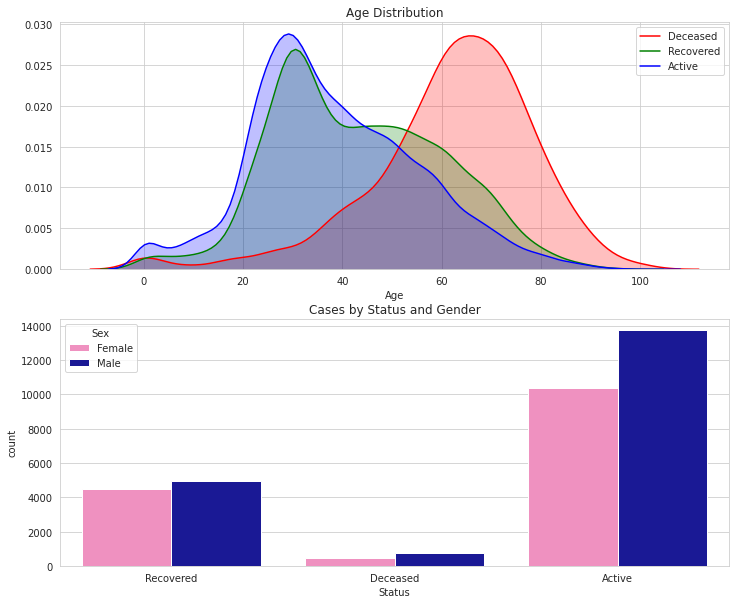

In [ ]:
g,axes = plt.subplots(2,1,figsize=(12,10))
sns.set_style('white')
g0 = sns.kdeplot(df[df['Status']=='Deceased']['Age'],color='r', shade=True, label='Deceased',ax=axes[0])
g1 = sns.kdeplot(df[df['Status']=='Recovered']['Age'],color='g',shade=True, label='Recovered',ax=axes[0])
g2 = sns.kdeplot(df[df['Status']=='Active']['Age'],color='b', shade=True, label='Active',ax=axes[0])
axes[0].set_title('Age Distribution')
axes[0].set_xlabel('Age')

g3 = sns.countplot(x='Status',data=df,hue='Sex',ax=axes[1],palette=sns.xkcd_palette(['pink','royal blue']))
axes[1].set_title('Cases by Status and Gender')
axes[1].set_xlabel('Status')
g.tight_layout
print('Most people who died from the virus are from the 60-80 age bracket.\n\nIt also shows that recoveries are likely to happen for the younger people with the virus.\n\nApparently, the most number of ACTIVE cases are from the people who are 20-40 years old.\n\nThere are also more men with the virus in each of the status category.\n\n\n')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
  This is separate from the ipykernel package so we can avoid doing imports until






The graph below shows that 90% of cases in the Philippines are from NCR, Region VII, and Region IV-A.

It can be inferred that the other regions dont have the capability to properly test its people due to lack of equipment.




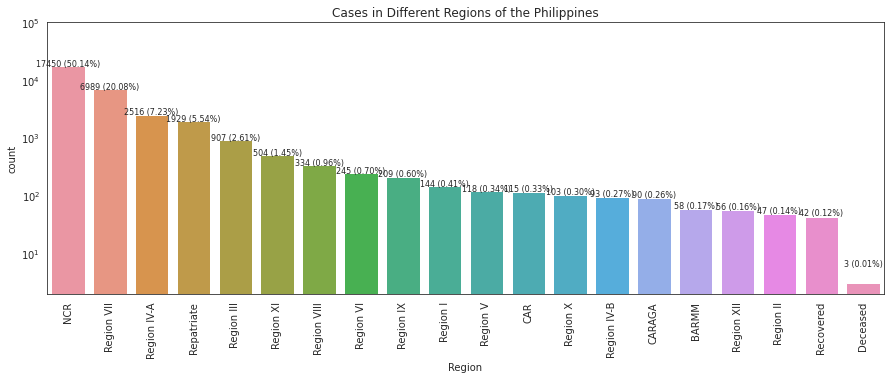

In [ ]:
plt.figure(figsize=(15,5))
g = sns.countplot(df['Region'],log=True,order=df['Region'].value_counts().index)
g.set_ylim(0,10e4)
g.set_title('Cases in Different Regions of the Philippines')
regions = []
for region in df['Region'].value_counts().index:
  regions.append(str(region).split(':')[0])
label1 = g.set_xticklabels(labels=regions,rotation=90)
for p in g.patches:
    height = p.get_height()
    g.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{} ({:1.2f}%)'.format(height,height*100/float(len(df))),
            ha="center",size=8)
print('\n\n\n\nThe graph below shows that 90% of cases in the Philippines are from NCR, Region VII, and Region IV-A.\n\nIt can be inferred that the other regions dont have the capability to properly test its people due to lack of equipment.\n\n')





Almost 30% of the total cases from the country came from Quezon city and Cebu city.

Manila ranked 3rd from the top city with most number of cases.




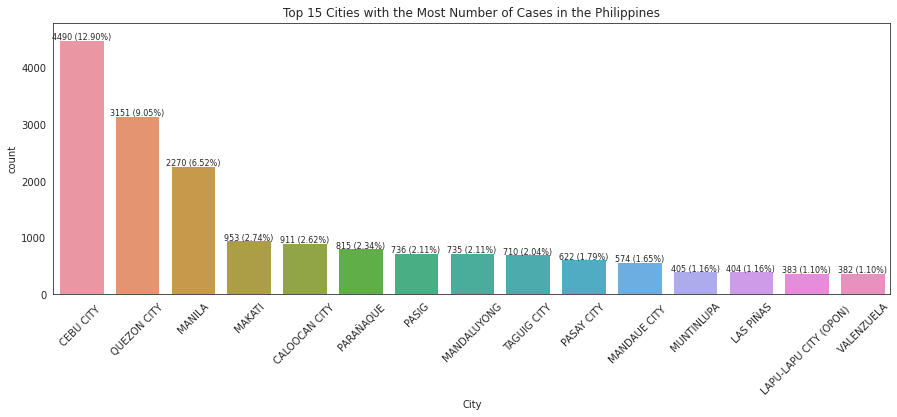

In [ ]:
plt.figure(figsize=(15,5))
g = sns.countplot(df['City'],order=df['City'].value_counts().index[0:15])
g.set_title('Top 15 Cities with the Most Number of Cases in the Philippines')
g.set_ylim(0,df['City'].value_counts()[0]+300)
cities = []
for city in df['City'].value_counts().index[0:15]:
  city = city.replace('(CAPITAL)','')
  cities.append(city.split('CITY OF')[-1])
g.set_xticklabels(labels=cities,rotation=45)
for p in g.patches:
    height = p.get_height()
    g.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{} ({:1.2f}%)'.format(height,height*100/float(len(df))),
            ha="center",size=8)

print('\n\nAlmost 30% of the total cases from the country came from Quezon city and Cebu city.\n\nManila ranked 3rd from the top city with most number of cases.\n\n')

Unconfirmed Admission in a Hospital Status : 23539 (67.63%)


 Only ~50% of the data is showing in this graph because these are only the confirmed admission in the dataset.

 Fortunately, for the confirmed hospital admissions, there are more admitted cases in the hospital but there are still lots of people that have the virus and are not admitted.





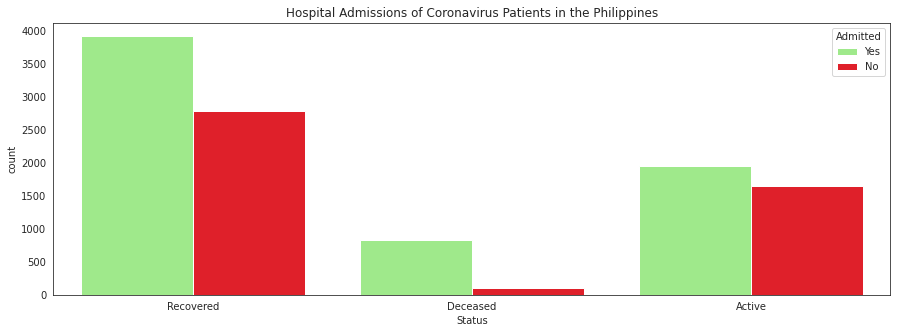

In [ ]:
plt.figure(figsize=(15,5))
g = sns.countplot(x='Status',data=df,hue='Admitted',palette=sns.xkcd_palette(['light green','bright red']))
g.set_title('Hospital Admissions of Coronavirus Patients in the Philippines')
print('Unconfirmed Admission in a Hospital Status : {} ({:1.2f}%)'.format(df['Admitted'].isnull().sum(),df['Admitted'].isnull().sum()/len(df)*100))
print('\n\n Only ~50% of the data is showing in this graph because these are only the confirmed admission in the dataset.\n\n Fortunately, for the confirmed hospital admissions, there are more admitted cases in the hospital but there are still lots of people that have the virus and are not admitted.\n\n\n')



There was a sudden rise in the number of cases in Cebu starting mid April.




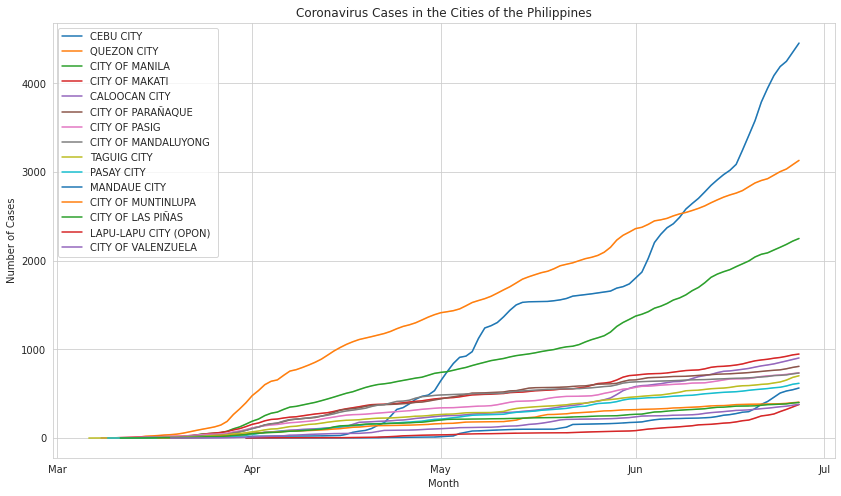

In [ ]:
plt.figure(figsize=(14,8))
sns.set_style('whitegrid')

def plotcity(city):
  g = sns.lineplot(x='Result Date',y=range(0,len(df[df['City']==city])),data=df[df['City']==city], label = city)
  g.set_xlabel('Month')
  g.set_ylabel('Number of Cases')
  g.set_title('Coronavirus Cases in the Cities of the Philippines')
  g.xaxis.set_major_locator(mdates.MonthLocator())
  g.xaxis.set_minor_locator(mdates.DayLocator())
  g.xaxis.set_major_formatter(mdates.DateFormatter('%b'))


for city in df['City'].value_counts().index[0:15]:
  plotcity(city)

print('\n\nThere was a sudden rise in the number of cases in Cebu starting mid April.\n\n')

In [ ]:
import datetime
#creating new dataframe that is grouped by City and Date
dfnew = df.groupby(['City','Result Date'])['Case #'].count().reset_index()

#Creating new column "New Cases (Within the past 3 days)"
blank = []
for i,row in dfnew.iterrows():
  blank.append(dfnew[(dfnew['City']==row['City'])&(dfnew['Result Date'] > (row['Result Date']-datetime.timedelta(4)))&(dfnew['Result Date'] <= row['Result Date'])]['Case #'].sum())
dfnew['New Cases (Within Past 3 Days)'] = blank



Quezon city is still having few hundreds of new cases recently.

The peak past 3 day new case was on May 3 in Cebu City with 415 new cases for the past 3 days.

From this graph, we can really tell that the trend for new cases is going down compared to last April except for Cebu City.




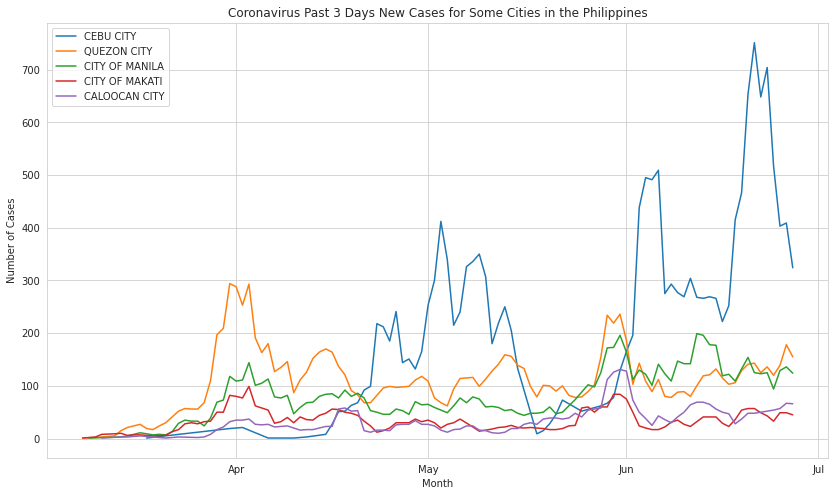

In [ ]:
plt.figure(figsize=(14,8))
sns.set_style('whitegrid')

def plotcitynewcases(city,y):
  g = sns.lineplot(x='Result Date',y=y,data=dfnew[dfnew['City']==city], label = city)
  g.set_xlabel('Month')
  g.set_ylabel('Number of Cases')
  g.set_title('Coronavirus Past 3 Days New Cases for Some Cities in the Philippines')
  g.xaxis.set_major_locator(mdates.MonthLocator())
  g.xaxis.set_minor_locator(mdates.DayLocator())
  g.xaxis.set_major_formatter(mdates.DateFormatter('%b'))


for city in df['City'].value_counts().index[0:5]:
  plotcitynewcases(city,'New Cases (Within Past 3 Days)')

print('\n\nQuezon city is still having few hundreds of new cases recently.\n\nThe peak past 3 day new case was on May 3 in Cebu City with 415 new cases for the past 3 days.\n\nFrom this graph, we can really tell that the trend for new cases is going down compared to last April except for Cebu City.\n\n')

In [ ]:
print('As of Today, {}, there are {} cases in the Philippines.\n\nThere are {} recoveries from the virus, {} deceased, and {} active cases.'.format(date.today().strftime("%B %d, %Y"),len(df),df['Status'].value_counts()[1],df['Status'].value_counts()[2],df['Status'].value_counts()[0]))

As of Today, July 15, 2020, there are 34803 cases in the Philippines.

There are 9430 recoveries from the virus, 1236 deceased, and 24114 active cases.
